### Generare le istanze

Prima assicurati di avere tutti i pachetti necessari installati. Se non hai installato i pacchetti, esegui il comando seguente: 
```bash
pip3 install -r requirements.txt
```

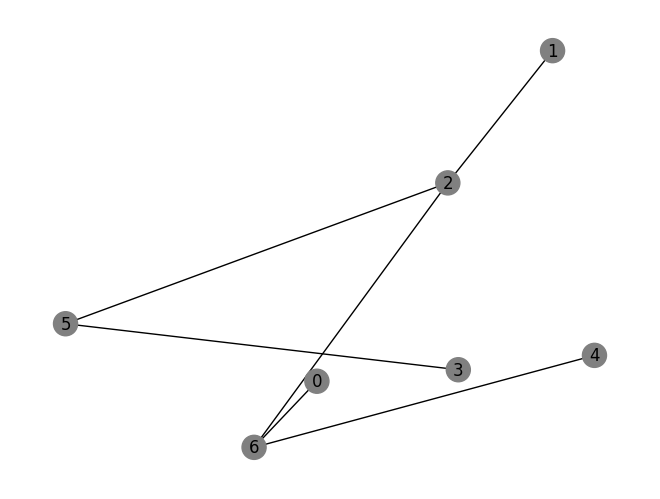

Number of edges:  6
Weight of the edges of the tree:  {(0, 6): 25.942243542145693, (1, 2): 50.15974481593781, (2, 5): 87.92041856133307, (2, 6): 99.16148445843275, (3, 5): 76.68767828015137, (4, 6): 72.44998274671983}
Number of nodes:  7
Number of flows:  3
Flows with their source and destination: [[0, 2], [4, 5], [5, 0]]


In [1]:
import networkx as nx
import utility_functions as uf

# CREATING A TREE NETWORK AND SAVING IT TO A .gml FILE

T = uf.generate_random_network_tree(7, 3, 150)
flows = uf.get_random_flows(T, 3)
uf.draw_tree(T)

nx.write_gml(T, "tree_net/tree.gml")

print("Number of edges: ", T.number_of_edges())
print("Weight of the edges of the tree: ", uf.get_weight_of_edges(T))
print("Number of nodes: ", T.number_of_nodes())
print("Number of flows: ", T.graph['K'])
print("Flows with their source and destination:", flows)

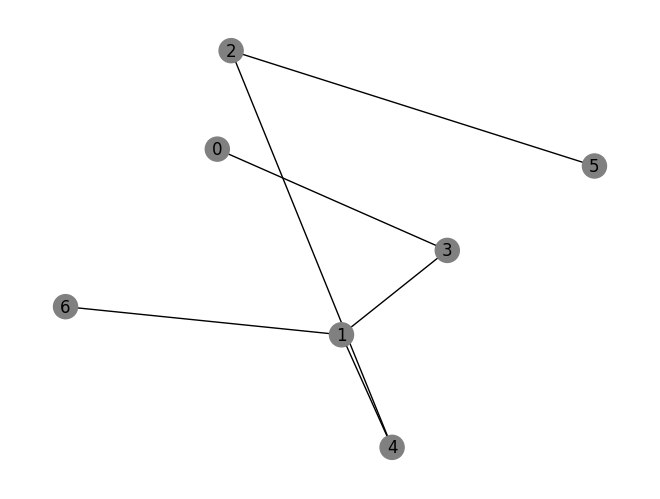

In [3]:
# READING THE TREE NETWORK FROM THE .gml FILE 

T = nx.read_gml("tree_net/tree.gml")
uf.draw_tree(T)

### Prima greedy naive

1. Iniziamo con un insieme vuoto di stazioni di ricarica.
2. Per ogni flusso da origine a destinazione, seguiamo il percorso dell'albero. Ogni veicolo (flusso) parte con autonomia L.
3. Mentre percorriamo il percorso, diminuiamo l'autonomia del veicolo della lunghezza dell'arco che si percorre.
4. Se l'autonommia non è sufficiente per percorrere il prossimo arco del percorso, quindi percorrendolo scenderebbe a zero o meno, posizioniamo una colonnina di ricarica sul nodo corrente.
5. Ripetiamo i passaggi 3-4 fino a quando tutti i veicoli hanno raggiunto le loro destinazioni.

Questa euristica cerca di minimizzare il numero di stazioni di ricarica posizionando ogni stazione il più lontano possibile lungo ogni percorso, dato che ogni veicolo parte con la carica completa e ogni stazione di ricarica ricarica completamente la batteria del veicolo.

[[  0.          99.41380355 286.17778242  61.6116872  140.89874057
  375.18340022 160.24142885]
 [ 99.41380355   0.         186.76397887  37.80211634  41.48493703
  275.76959667  60.8276253 ]
 [286.17778242 186.76397887   0.         224.56609522 145.27904185
   89.0056178  247.59160418]
 [ 61.6116872   37.80211634 224.56609522   0.          79.28705337
  313.57171302  98.62974165]
 [140.89874057  41.48493703 145.27904185  79.28705337   0.
  234.28465965 102.31256233]
 [375.18340022 275.76959667  89.0056178  313.57171302 234.28465965
    0.         336.59722198]
 [160.24142885  60.8276253  247.59160418  98.62974165 102.31256233
  336.59722198   0.        ]]
Chargin stations on nodes: {'4'}
All the paths (a path for each flow):  [['6', '1', '4', '2'], ['3', '1', '4'], ['4', '1', '3', '0']] 



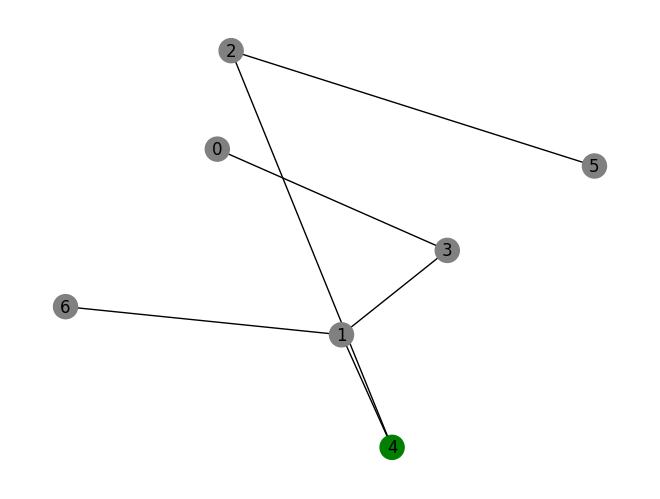

In [6]:
import networkx as nx
import utility_functions as uf

# READING THE TREE NETWORK FROM THE .gml FILE 
T = nx.read_gml("tree_net/tree.gml")

K = 3   # the number of flows
L = 150 # the battery capacity of the electric vehicle

flows = uf.get_random_flows(T, K)
print(nx.floyd_warshall_numpy(T))

def greedy_electric_charging(Tree: nx.Graph, flows: list, L: int):
    charging_stations = set()
    paths = uf.get_all_paths_of_all_flows(Tree, flows)
    for path in paths:
        charge = L
        for i in range(len(path) - 1):
            charge -= Tree.edges[(path[i], path[i+1])]['weight']
            if charge < 0:
                charging_stations.add(path[i])
                charge = L
    return charging_stations

charging_stations = greedy_electric_charging(T, flows, L)

print("Chargin stations on nodes:", (charging_stations))
print("All the paths (a path for each flow): ", uf.get_all_paths_of_all_flows(T, flows), "\n")

uf.set_chrg_stations(T, charging_stations)
uf.draw_tree(T)

### Algoritmo costruttivo
1. Iniziamo con un insieme di stazioni di ricarica riempito randomicamente.
2. Per ogni flusso da origine a destinazione, seguiamo il percorso dell'albero. Ogni veicolo (flusso) parte con autonomia L.
3. Controlliamo se la soluzione creata inizialmente in maniera randomica è ammissibile, ossia se tutti i veicoli riescono a raggiungere la propria destinazione con le colonnine posizionate.
4. Se quanto detto al punto 3 è vero, allora si è trovata la soluzione.

Admissible charching stations: ['2', '3', '4', '6']


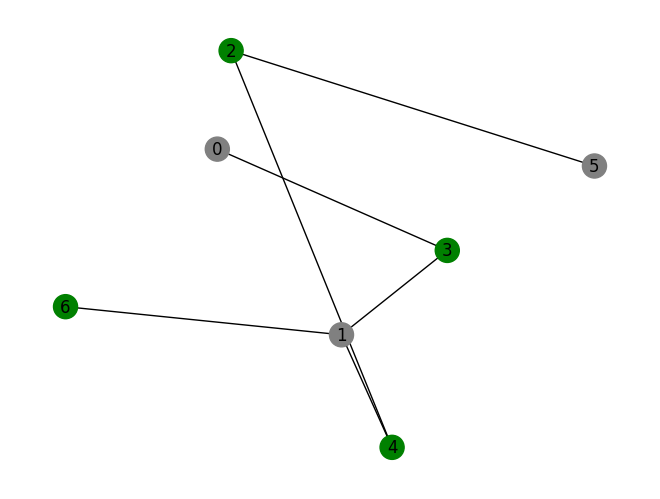

In [3]:
import networkx as nx
import utility_functions as uf

# READING THE TREE NETWORK FROM THE .gml FILE 
T = nx.read_gml("tree_net/tree.gml")

K = 3   # the number of flows
L = 150 # the battery capacity of the electric vehicle

flows = uf.get_random_flows(T, K)

while True:
    T = nx.read_gml("tree_net/tree.gml")
    charging_stations = uf.get_random_chrg_stations(T)
    if uf.is_admissible(T, flows, L):
        print("Admissible charching stations:", charging_stations)
        break
    else:
        pass

uf.draw_tree(T)

# Algoritmo di programmazione dinamica
GitHub Copilot: Un altro possibile algoritmo per risolvere questo problema potrebbe essere l'utilizzo di un algoritmo di programmazione dinamica. L'idea sarebbe di calcolare il numero minimo di stazioni di ricarica necessarie per ogni coppia di nodi nell'albero.

Ecco un possibile pseudocodice per l'algoritmo:

1. Calcola la matrice delle distanze tra tutti i nodi utilizzando l'algoritmo di Floyd-Warshall.
2. Inizializza una matrice `stations` con le stesse dimensioni della matrice delle distanze, dove `stations[i][j]` rappresenta il numero minimo di stazioni di ricarica necessarie per andare dal nodo `i` al nodo `j`.
3. Per ogni coppia di nodi `(i, j)`, se la distanza `dist[i][j]` è maggiore di `L`, calcola `stations[i][j]` come il minimo di `stations[i][k] + stations[k][j] + 1` per tutti i nodi `k` tali che `dist[i][k]` e `dist[k][j]` siano entrambi minori o uguali a `L`.
4. Alla fine, la somma di `stations[i][j]` per tutte le coppie `(i, j)` nei flussi rappresenta il numero minimo totale di stazioni di ricarica necessarie.

In questo codice, `G` è il grafo generato con networkx, `L` è l'autonomia del veicolo, e `flows` è una lista di coppie di nodi rappresentanti i flussi. La funzione `min_charging_stations` restituisce il numero minimo di colonnine di ricarica necessarie.

In [4]:
import networkx as nx
import utility_functions as uf
import numpy as np

# READING THE TREE NETWORK FROM THE .gml FILE 
T = nx.read_gml("tree_net/tree.gml")

K = 3   # the number of flows
L = 150 # the battery capacity of the electric vehicle

flows = uf.get_random_flows(T, K)


'''n = len(T.nodes)
dist = nx.floyd_warshall_numpy(T)
stations = np.zeros((n, n), dtype=int)
print("n", n, "\n", "stations", stations, "\n", "dist", dist)'''

def min_charging_stations(G, L, flows):
    n = len(G.nodes)
    dist = nx.floyd_warshall_numpy(G)
    stations = np.zeros((n, n), dtype=int)
    for i in range(n):
        costo = L
        for j in range(n):
            if dist[i, j] > L:
                stations[i, j] += 1
                '''stations[i, j] = min(stations[i, k] + stations[k, j] + 1
                                     for k in range(n) if dist[i, k] <= L and dist[k, j] <= L)'''
    return stations

print("Minimum number of charging stations:\n", min_charging_stations(T, L, flows))

Minimum number of charging stations:
 [[0 0 1 0 0 1 1]
 [0 0 1 0 0 1 0]
 [1 1 0 1 0 0 1]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 1 0]
 [1 1 0 1 1 0 1]
 [1 0 1 0 0 1 0]]
